In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# Get the current working directory
current_path = os.getcwd()
# Get the parent directory
parent_directory = os.path.abspath(os.path.join(current_path, os.pardir))
print("Parent Directory:", parent_directory)

Parent Directory: /home/anibal/roman_rubin


In [2]:
path= parent_directory+'/all_results/PB/'
fit_rr = pd.read_csv("/home/anibal/roman_rubin/all_results/PB/test_PB/fit_rr.csv")
fit_roman =  pd.read_csv("/home/anibal/roman_rubin/all_results/PB/test_PB/fit_roman.csv")
true = pd.read_csv("/home/anibal/roman_rubin/all_results/PB/test_PB/true.csv")
true['categories']=true['Category']
fit_rr['chi2']=fit_rr['chichi']
fit_roman['chi2']=fit_roman['chichi']


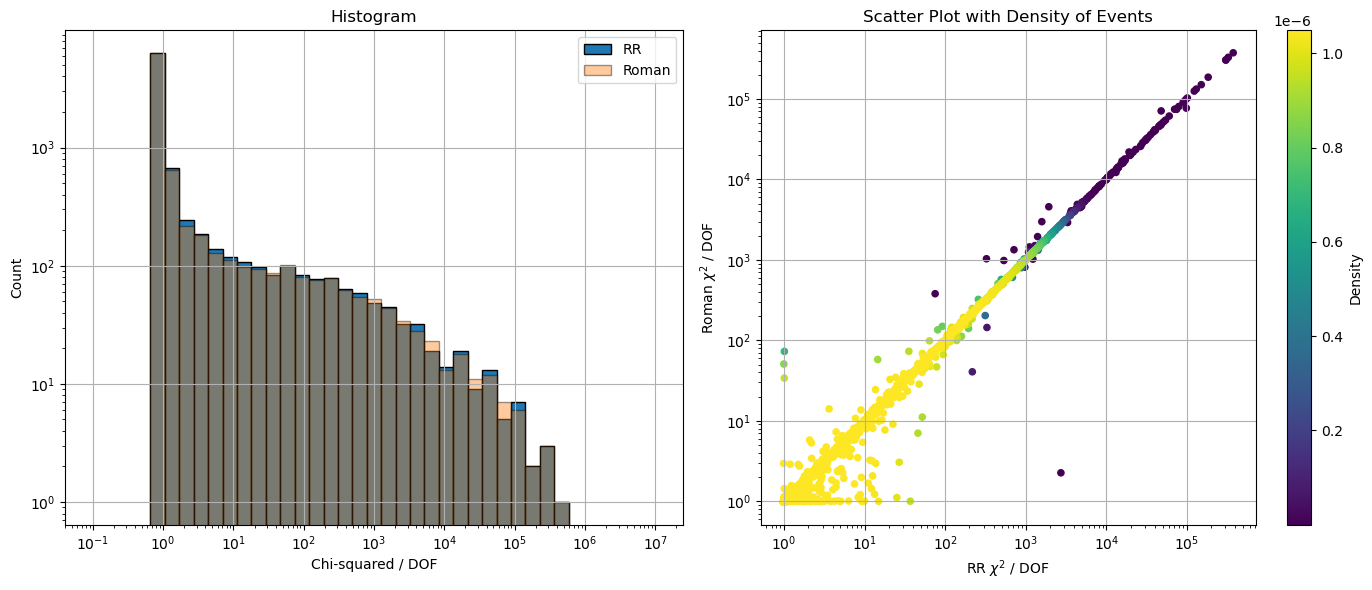

In [6]:
# Calculate values for histograms and scatter plot
rr_values = fit_rr['chichi'] / fit_rr['dof']
roman_values = fit_roman['chichi'] / fit_roman['dof']

# Estimate the density of points using gaussian_kde
xy = np.vstack([rr_values, roman_values])
density = gaussian_kde(xy)(xy)

# Sort the points by density so that dense points are plotted last
sorted_indices = density.argsort()
rr_values = rr_values[sorted_indices]
roman_values = roman_values[sorted_indices]
density = density[sorted_indices]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram
axes[0].hist(rr_values, bins=np.logspace(-1, 7, 40), edgecolor='k', label='RR')
axes[0].hist(roman_values, bins=np.logspace(-1, 7, 40), edgecolor='k', alpha=0.4, label='Roman')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].grid()
axes[0].set_title("Histogram")
axes[0].set_xlabel("Chi-squared / DOF")
axes[0].set_ylabel("Count")
axes[0].legend()

# Plot the scatter plot with density
scatter = axes[1].scatter(rr_values, roman_values, c=density, cmap='viridis', s=20)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].grid()
axes[1].set_title("Scatter Plot with Density of Events")
axes[1].set_xlabel(r"RR $\chi^2$ / DOF")
axes[1].set_ylabel(r"Roman $\chi^2$ / DOF")

# Add colorbar
cb = fig.colorbar(scatter, ax=axes[1], orientation='vertical')
cb.set_label('Density')

# Adjust layout and show
plt.tight_layout()
plt.show()
